In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sunRay.parameters import c,c_r,R_S  # physics parameters
from scipy import integrate



In [104]:
data  = np.load('sunray_big.npz')

In [105]:
absorb_r = (np.count_nonzero((np.isnan(data.f.r_vec_collect_local[-1,1,:]))))/data.f.photon_N

In [106]:
# retrive the data from archive
steps_N  =data.f.steps_N
collect_N =data.f.collect_N
photon_N =data.f.photon_N
start_r =data.f.start_r
start_theta =data.f.start_theta
start_phi  =data.f.start_phi
f_ratio  =data.f.f_ratio
epsilon =data.f.epsilon 
anis =data.f.anis
asym =data.f.asym
t_collect=data.f.t_collect
tau=data.f.tau
r_vec_collect_local=data.f.r_vec_collect_local
k_vec_collect_local=data.f.k_vec_collect_local

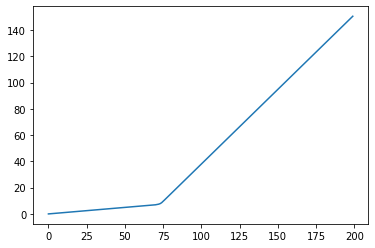

In [6]:
plt.plot(t_collect)

In [7]:
absorb_r

0.13254

In [107]:
find_small_1e3 = lambda arr:  np.sort(arr)[int(photon_N*1e-3)]

In [108]:
# collect the photons
r_vec_end = r_vec_collect_local[-1,:,:].reshape(3,-1)
k_vec_end = k_vec_collect_local[-1,:,:].reshape(3,-1)
rr_end = np.sqrt(np.sum(r_vec_end**2,axis=0))
kk_end = np.sqrt(np.sum(k_vec_end**2,axis=0))

kx_end,ky_end,kz_end = k_vec_end[0,:],k_vec_end[1,:],k_vec_end[2,:]



In [109]:
# use the majority photons
r_get = find_small_1e3(rr_end)
 

In [110]:
r_vec_end.shape

(3, 500000)

In [111]:
# fit to find t and x_im y_im

In [112]:
# histogram

In [113]:
R_S = 6.96e10         # the radius of the sun 
c   = 2.998e10        # speed of light
c_r = c/R_S           # [t]


In [114]:
idx_for_stat = np.where( (rr_end>(r_get-0.1)) & 
                         (kz_end/kk_end>0.9) & 
                         (kz_end/kk_end<1.0) )

In [133]:
x_im_stat = np.zeros(idx_for_stat[0].shape)
y_im_stat = np.zeros(idx_for_stat[0].shape)
t_reach_stat = np.zeros(idx_for_stat[0].shape)
tau_stat = np.zeros(idx_for_stat[0].shape)


idx_tmp = 0
for idx_cur in idx_for_stat[0]:
    # for all rays do the collect:
    r_vec_tmp = r_vec_collect_local[:,:,idx_cur]
    rr_tmp = np.sqrt(np.sum(r_vec_tmp**2,axis=1))
    idx_r_reach = np.argmin(np.abs(rr_tmp-r_get))
    # linear estimation of the [t,r,k] at r_get
    t_reach_tmp = (t_collect[idx_r_reach-1] + 
        (t_collect[idx_r_reach]-t_collect[idx_r_reach-1]) *
        (r_get-rr_tmp[idx_r_reach-1]) /
        (rr_tmp[idx_r_reach]-rr_tmp[idx_r_reach-1]) )

    r_vec_reach_tmp = (r_vec_collect_local[idx_r_reach-1,:,idx_cur] + 
        (r_vec_collect_local[idx_r_reach,:,idx_cur]-
         r_vec_collect_local[idx_r_reach-1,:,idx_cur]) *
        (r_get-rr_tmp[idx_r_reach-1]) /
        (rr_tmp[idx_r_reach]-rr_tmp[idx_r_reach-1]) )

    k_vec_reach_tmp = (k_vec_collect_local[idx_r_reach-1,:,idx_cur] + 
        (k_vec_collect_local[idx_r_reach,:,idx_cur]-
         k_vec_collect_local[idx_r_reach-1,:,idx_cur]) *
        (r_get-rr_tmp[idx_r_reach-1]) /
        (rr_tmp[idx_r_reach]-rr_tmp[idx_r_reach-1]) )

    t_reach_stat[idx_tmp] = t_reach_tmp

    kk_tmp = np.sqrt(np.sum(k_vec_reach_tmp**2))
    kx_tmp = k_vec_reach_tmp[0]
    ky_tmp = k_vec_reach_tmp[1]
    kz_tmp = k_vec_reach_tmp[2]

    # use Delta R as free path integral
    r_free_tmp_a = np.sqrt(np.sum((r_vec_reach_tmp - r_vec_collect_local[0,:,idx_cur])**2))
    # use t*c as free path integral
    r_free_tmp_b = t_reach_tmp*c_r

    x_im_stat[idx_tmp] = r_vec_reach_tmp[0] - r_free_tmp_a*kx_tmp/kk_tmp
    y_im_stat[idx_tmp] = r_vec_reach_tmp[1] - r_free_tmp_a*ky_tmp/kk_tmp

    
    tau_stat[idx_tmp] = tau[idx_cur]

    idx_tmp = idx_tmp+1    


In [134]:
r_vec_tmp[0,:]

array([3.08559613e-02, 1.91450744e-04, 1.74985318e+00])

(-4.0, 4.0, -4.0, 4.0)

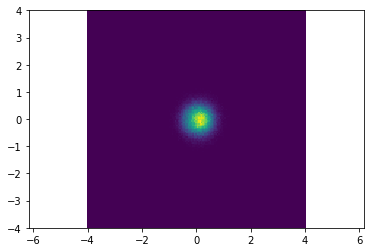

In [148]:
hst = plt.hist2d(x_im_stat,y_im_stat,bins=[np.linspace(-4,4,150),np.linspace(-4,4,150)],weights=np.exp(-tau_stat))
plt.axis('equal')

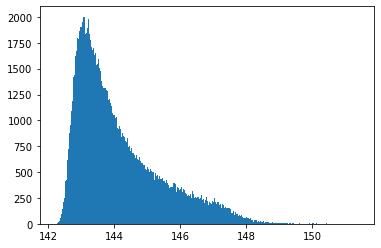

In [128]:
hst = plt.hist(t_reach_stat,300)

In [136]:
hst

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1.1883006 , -1.13519021, -1.08207982, -1.02896942, -0.97585903,
        -0.92274864, -0.86963824, -0.81652785, -0.76341745, -0.71030706,
        -0.65719667, -0.60408627, -0.55097588, -0.49786548, -0.44475509,
        -0.3916447 , -0.3385343 , -0.28542391, -0.23231351, -0.17920312,
        -0.12609273, -0.07298233, -0.01987194,  0.03323846,  0.08634885,
         0.13945924,  0.19256964,  0.24568003,  0.29879043,  0.35190082,
         0.40501121,  0.45812161,  0.511232  ,  0.5643424 ,  0.61745279,
         0.67056318,  0.72367358,  0.77678397,  0.82989437,  0.88300476,
         0.93611515,  0.98922555,  1.04233594,  1.09544634,  1.14855673,
         1.20166712,  1.25477752,  1.30788791,  1.36099831,  1.4141087 ,
         1.46721909])

In [145]:
print(hst[0][20,:])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.22065742e-01 0.00000000e+00 4.40566029e-01 1.70077755e+00
 1.70748397e+00 6.95538646e+00 5.89382475e+00 9.85790884e+00
 1.26816283e+01 2.18808190e+01 2.89920703e+01 4.33193431e+01
 6.20829333e+01 6.96648978e+01 8.87157899e+01 8.75351301e+01
 1.02120347e+02 1.11840275e+02 1.07779498e+02 1.13492928e+02
 1.17933382e+02 1.16222340e+02 1.07980399e+02 9.12755591e+01
 8.95812356e+01 8.26491111e+01 7.54039651e+01 5.97456903e+01
 4.14483934e+01 3.11447867e+01 2.23753065e+01 1.72361751e+01
 1.14423529e+01 2.51488231e+00 1.75856313e+00 1.58451947e+00
 4.89390125e-01 7.68808850e-01 2.72333048e-01 0.00000000e+00
 1.13675706e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.60123366e-01 0.00000000e+00]


In [ ]:
# finish time diff based 
# fit guassian